In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math as mt
from sklearn import decomposition
import pandas as pd
from sklearn.cluster import KMeans

In [167]:
#Function to read the image
def reading_image(Image):
    Image_raw = open(Image,'rb').read()
    Image_raw = np.frombuffer(Image_raw,np.uint8)
    Image_matrix = Image_raw[0:Row_Size*Column_Size]
    Image_matrix = np.reshape(Image_matrix, (Row_Size,Column_Size))
    return Image_matrix;


In [ ]:
def kmeans_clustering(Components):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(Components)
    labels = kmeans.predict(Components)
    return labels,kmeans;


In [168]:
Row_Size = 28;
Column_Size = 28;
Input_image1 = reading_image('zero_1.raw')
Input_image2 = reading_image('zero_2.raw')
Input_image3 = reading_image('zero_3.raw')
Input_image4 = reading_image('zero_4.raw')
Input_image5 = reading_image('zero_5.raw')
Input_image6 = reading_image('one_1.raw')
Input_image7 = reading_image('one_2.raw')
Input_image8 = reading_image('one_3.raw')
Input_image9 = reading_image('one_4.raw')
Input_image10 = reading_image('one_5.raw')
Test_image = reading_image('eight.raw')

In [169]:
sift1 = cv2.xfeatures2d.SIFT_create()
sift2 = cv2.xfeatures2d.SIFT_create()
sift3 = cv2.xfeatures2d.SIFT_create()

In [170]:
kp1, des1 = sift1.detectAndCompute(Input_image1,None)
kp2, des2 = sift1.detectAndCompute(Input_image2,None)
kp3, des3 = sift1.detectAndCompute(Input_image3,None)
kp4, des4 = sift1.detectAndCompute(Input_image4,None)
kp5, des5 = sift1.detectAndCompute(Input_image5,None)

In [171]:
kp6, des6 = sift2.detectAndCompute(Input_image6,None)
kp7, des7 = sift2.detectAndCompute(Input_image7,None)
kp8, des8 = sift2.detectAndCompute(Input_image8,None)
kp9, des9 = sift2.detectAndCompute(Input_image9,None)
kp10, des10 = sift2.detectAndCompute(Input_image10,None)

In [172]:
np.shape(des9)

(5, 128)

In [173]:
kptest, destest = sift3.detectAndCompute(Test_image,None)

In [174]:
des0 = np.zeros((42,128))
des0[0:12,:] = des1;
des0[12:20,:] = des2;
des0[20:22,:] =des3;
des0[22:34,:] = des4;
des0[34:41,:] = des5;

In [176]:
des1 = np.zeros((14,128))
des1[0:2,:] =des6;
des1[2:5,:] =des7;
des1[5:8,:] =des8;
des1[8:13,:] = des9;

In [177]:
Labels0,kmeans0 = kmeans_clustering(des0);

In [178]:
Labels0

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [179]:
Labels1,kmeans1 = kmeans_clustering(des1);

In [180]:
Labels1

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [181]:
Labelstest,kmeanstest = kmeans_clustering(destest);

In [182]:
Labelstest

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

Text(0,0.5,'frequency')

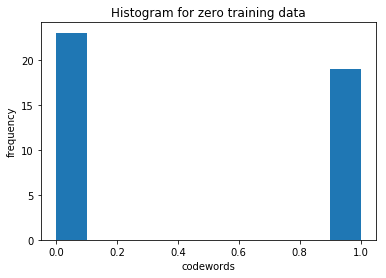

In [198]:
n0 ,  bins0, patches0 = plt.hist(Labels0)
plt.title('Histogram for zero training data')
plt.xlabel('codewords')
plt.ylabel('frequency')


In [184]:
bins0

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Text(0,0.5,'frequency')

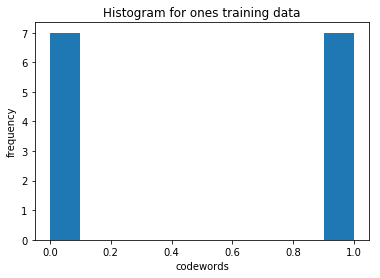

In [200]:
n1 ,  bins1, patches1 = plt.hist(Labels1)
plt.title('Histogram for ones training data')
plt.xlabel('codewords')
plt.ylabel('frequency')

In [186]:
bins1

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Text(0,0.5,'frequency')

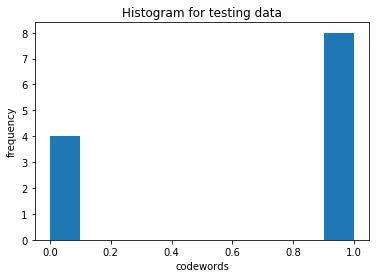

In [199]:
ntest,binstest,patchestest = plt.hist(Labelstest)
plt.title('Histogram for testing data')
plt.xlabel('codewords')
plt.ylabel('frequency')

In [188]:
binstest

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [189]:
n0

array([23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.])

In [190]:
n1

array([7., 0., 0., 0., 0., 0., 0., 0., 0., 7.])

In [191]:
ntest

array([4., 0., 0., 0., 0., 0., 0., 0., 0., 8.])

In [192]:
ratio0 = [];
for i in range(0, len(n0)):
    if (n0[i] > 0 and ntest[i] > 0):
        if n0[i]> ntest[i]:
            ratio0.append(ntest[i]/n0[i]);
        else:
            ratio0.append(n0[i] / ntest[i]);

In [193]:
ratio0sum = sum(ratio0)

In [194]:
ratio0sum

0.5949656750572082

In [195]:
ratio1 = [];
for i in range(0, len(n1)):
    if (n1[i] > 0 and ntest[i] > 0):
        if n1[i]> ntest[i]:
            ratio1.append(ntest[i]/n1[i]);
        else:
            ratio1.append(n1[i] / ntest[i]);

In [196]:
ratio1sum = sum(ratio1)

In [197]:
ratio1sum

1.4464285714285714